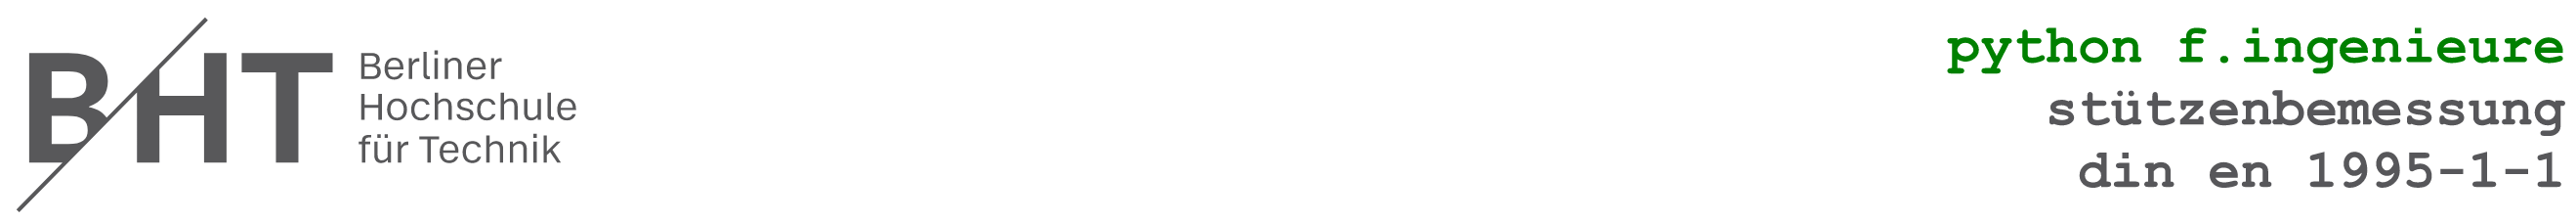

# Anwendungsbeispiel 1: Stützenbemessung

## Erstellung von Funktionen und Verknüpfung mit Excel

Nachdem die beiden Nachweisverfahren für die Stützenbemessung nach der DIN EN 1995-1-1 für je eine Stützenposition durchgerechnet wurde, soll im Folgenden nun die Verknüpfung mit Excel erfolgen. Dies wird wieder anhand einer Schleife umgesetzt. Um das Skript übersichtlicher zu gestalten wurden die beiden Nachweisverfahren in Funktionen verpackt und werden gezielt in der Schleife abgerufen.

### Bibliotheken

In [42]:
from math import sqrt, pi, cos, sin
import os
import pandas as pd                 #Erstellen von Tabellen
import handcalcs.render             #Darstellung formattierter Gleichungen
import xlwings as xw                #Interaktion mit Excel
%run 3.4_Anwendungsbeispiel_1_Erstellung_von_Funktionen.ipynb

### Verknüpfung mit einer Excel-Arbeitsmappe und Arbeitsblatt Verknüpfung mit Excel-Datei

Im Folgenden wird mit einem Pfad eine Arbeitsmappe mit dem Modul **xlwings** verknüpft. Die Arbeitsmappe und das Arbeitsblatt werden mit den Funktionen **Book** und **sheets** verknüpft und Variablen zugeordnet. <br>

```Python
wb = xlwings.Book(pfad)
ws = xlwings.Book(pfad).sheets(arbeitsblatt)
```
Um die Excel-Datei mit dem Befehl *Book()* zu verknüpfen, wird als Argument der Pfad zur Datei benötigt. 

#### Pfade
Die Angaben von Pfaden sind notwendig, um die Verknüpfung mit Daten zu erstellen und dienen der Navigation. Sowohl in Windows als auch in Python werden umgekehrte Schrägstriche " \ " als Trennzeichen verwendet. Da in der Programmierung ein umgekehrtes Schrägzeichen ebenfalls die Funktion eines Zeilenumbruchs innerhalb einer Funktion oder Befehls hat, gibt es die Möglichkeit den Pfad wie folgt zu definieren:

```Python
pfad = "C:\\Users\\Cal.Mense\\Desktop" #doppelte Schrägstriche
```
Eine weitere Schreibweise bietet die Verwendung eines Präfixes r. Der Pfad wird somit in ein Python-Raw-String konvertiert, sodass die Ausrichtung der Schrägstriche ignoriert wird.

```Python
pfad = r"C:/Users/Cal.Mense/Desktop" #Raw-String
```

**Relative Pfadangabe** <br>
Für sich ändernde Ordnerstrukturen eignen sich besonders relative Pfade. Die Position wird relativ zum aktuellen Verzeichnis beschrieben und ist somit unabhägig von der Datenstruktur eines Computersystems. Für das Navigieren wird ein Doppelpunkt für die höhere Ebene und ein einzelner Punkt für das aktuelle Verzeichnis verwendet.

![image.png](attachment:image.png)

Für die vorhandene Ordnerstruktur befinden sich die Jupyter-Arbeitsblätter im Ordner *02_Jupyter_Notebooks*. Für das Verknüpfen mit der Excel-Datei im Ordner *01_Stützenbemessung_ec5_63* wird der Pfad wie folgt eingegeben.

In [9]:
pfad = r"..\01_Anwendungsbeispiele\01_Stützenbemessung_ec5_63\Stützenbemessung_ec5_63.xlsm"
wb = xw.Book(pfad)
ws = wb.sheets['Stützenbemessung']

<div class="alert alert-block alert-warning">
<b>Anmerkung: Es ist wichtig, dass die Excel-Datei bereits geöffnet ist, um eine Fehlermeldung zu vermeiden.
</div>

#### Range-Objekt
Mit dem **Range-Objekt** können nun einzelne Zellen und Zellbereiche ausgewählt und abgerufen werden. Die Auswahl kann über verschiedene Wege erfolgen.

```Python
wb.Range('A1')
wb.Range('A1:C3')
wb.Range((1,1))
wb.Range((1,1), (3,3))

xlwings.Range(Zelle 1, Zelle 2 (optional))
xlwings.Range((Zeile_1, Spalte_1), (Zeile_2, Spalte_2))
```

In Anlehnung an die Schreibweise von Visual Basic (VBA) wird zunächst die Zeile und dann die Spalte referenziert.

#### Direkter Verweis

In [11]:
#Verknüpfung mit Excel-Datei
pfad = r"..\01_Anwendungsbeispiele\01_Stützenbemessung_ec5_63\Stützenbemessung_ec5_63.xlsm"
wb = xw.Book(pfad)
ws = wb.sheets['Stützenbemessung']

pos = ws.range('G8').value
pos_nr = ws.range('G10:G15').value

print(str(pos) + ' = ' + str(pos_nr))

Pos. = ['S-201', 'S-202', 'S-203', 'S-204', 'S-205', 'S-206']


#### Index-Verweis
Ebenso können dieselben Zellen mit der Angabe von Zellen- und Spaltenindizes definiert werden.

In [13]:
#Verknüpfung mit Excel-Datei
pfad = r"..\01_Anwendungsbeispiele\01_Stützenbemessung_ec5_63\Stützenbemessung_ec5_63.xlsm"
wb = xw.Book(pfad)
ws = wb.sheets['Stützenbemessung']

pos = ws.range((8,7)).value
pos_nr = ws.range((10,7),(15,7)).value

print(str(pos) + ' = ' + str(pos_nr))

Pos. = ['S-201', 'S-202', 'S-203', 'S-204', 'S-205', 'S-206']


#### Dynamischer Verweis
Der Vorteil eines Index-Verweises ist die Möglichkeit, die Indizes mit Variablen auszutauschen, sodass der Zellenbezug dynamisch definiert werden kann. <br>
Im Folgenden wird einmal, die Variabel ***n_pos*** an Stelle ***Zeile_2*** gestellt, um somit die Anzahl der Positionen zu bestimmen. <br>
Im zweiten Beispiel wird die Variabel für den Spaltenindex definiert.

In [14]:
#Verknüpfung mit Excel-Datei
pfad = r"..\01_Anwendungsbeispiele\01_Stützenbemessung_ec5_63\Stützenbemessung_ec5_63.xlsm"
wb = xw.Book(pfad)
ws = wb.sheets['Stützenbemessung']

#Anzahl der Positionen als Variabel
n_pos = 5
pos = ws.range((8,7)).value
pos_nr = ws.range((10,7),(10+n_pos,7)).value

print(str(pos) + ' = ' + str(pos_nr))

#Spaltenindex als Variabel
n_spalte = 7
pos = ws.range((8,n_spalte)).value
pos_nr = ws.range((10,n_spalte),(10+n_pos,n_spalte)).value

print(str(pos) + ' = ' + str(pos_nr))

Pos. = ['S-201', 'S-202', 'S-203', 'S-204', 'S-205', 'S-206']
Pos. = ['S-201', 'S-202', 'S-203', 'S-204', 'S-205', 'S-206']


#### Dynamische Anzahl der Tabelleneinträge

Mit der Eigenschaft *current_region.last_cell.row* kann bestimmt werden, wieviele Zeileneinträge in dem Arbeitsblatt vorhanden sind. Bei einer sich verändernden Tabelle passt sich somit die Variabel **row_num** automatisch an.

```Python
ws.range('B10').current_region.last_cell.row
```

In [18]:
#Verknüpfung mit Excel-Datei
pfad = r"..\01_Anwendungsbeispiele\01_Stützenbemessung_ec5_63\Stützenbemessung_ec5_63.xlsm"
wb = xw.Book(pfad)
ws = wb.sheets['Stützenbemessung']

startrow = 10
rownum = ws.range('G10').current_region.last_cell.row
n_pos = rownum-startrow
print('Die Anzahl der Stützenpositionen beträgt: ' + str(n_pos))

Die Anzahl der Stützenpositionen beträgt: 62


#### Einlesen der Listen

Es werden nun alle Spalten der Tabelle als Listen eingelesen. <br>
Die Listen werden gemäß der Namenkonvention Variablen zugeordnet.<br>
Um die Anzahl der Einträge dynamisch zu definieren, erfolgt das Einlesen mit der Variable <b>rownum<b>.

<div class="alert alert-block alert-warning">
<b>Anmerkung:</b> Da die Interaktion mit Excel das Skript verlangsamt, ist es zu empfehlen am Anfang eines Skriptes die Listen als Variablen einzulesen, sodass beliebig auf die Werte zugegriffen werden kann, ohne ständig zwischen Programmen springen zu müssen.
</div>

In [24]:
#Verknüpfung mit Excel-Datei
pfad = r"..\01_Anwendungsbeispiele\01_Stützenbemessung_ec5_63\Stützenbemessung_ec5_63.xlsm"
wb = xw.Book(pfad)
ws = wb.sheets['Stützenbemessung']

startrow = 10
rownum = ws.range('G10').current_region.last_cell.row
n_pos = rownum-startrow

#Einlesen der Listen
L_pos = ws.range((startrow,7), (rownum,7)).value
L_ges = ws.range((startrow,8), (rownum,8)).value
L_system = ws.range((startrow,9), (rownum,9)).value
L_L = ws.range((startrow,10), (rownum,10)).value
L_b = ws.range((startrow,11), (rownum,11)).value
L_h = ws.range((startrow,12), (rownum,12)).value
L_N_ed = ws.range((startrow,13), (rownum,13)).value
L_M_yd = ws.range((startrow,14), (rownum,14)).value
L_M_zd = ws.range((startrow,15), (rownum,15)).value
L_h_art = ws.range((startrow,16), (rownum,16)).value
L_f_c0k = ws.range((startrow,17), (rownum,17)).value
L_f_myk = ws.range((startrow,18), (rownum,18)).value
L_E0mean = ws.range((startrow,19), (rownum,19)).value
L_E_05 = ws.range((startrow,20), (rownum,20)).value
L_G_05 = ws.range((startrow,21), (rownum,21)).value
L_k_mod = ws.range((startrow,22), (rownum,22)).value
L_gamma = ws.range((startrow,23), (rownum,23)).value

**Darstellung der Daten**<br>

Während des Bearbeitens eines Skriptes ist es zu empfehlen zwischendurch die Ergebnisse zur Kontrolle darzustellen. In der Jupyter Notebook Umgebung eignen sich DataFrames (s. 3.3_Anwendungsbeispiel_1_Stabilitätsnachweis_Theorie II. Ordnung.ipynb Kap. 3.1.6.1). <br>

In [25]:
dict = {'Pos':L_pos, 'Holzart': L_h_art, 'Länge':L_L, 
        'b [m]':L_b, 'h [m]':L_h, 'N_ed [kN]':L_N_ed, 'M_yd [kNm]':L_M_yd, 'M_zd [kNm]':L_M_zd}
df = pd.DataFrame(dict)
df.head(10)

,Pos,Holzart,Länge,b [m],h [m],N_ed [kN],M_yd [kNm],M_zd [kNm]
0,S-201,GL 24h,4.0,0.5,0.5,2400.0,0.0,0.0
1,S-202,GL 24c,4.0,0.5,0.5,2400.0,0.0,0.0
2,S-203,GL 28h,4.0,0.5,0.5,2400.0,0.0,0.0
3,S-204,GL 28c,4.0,0.5,0.5,2400.0,0.0,0.0
4,S-205,GL 32h,4.0,0.5,0.5,2400.0,0.0,0.0
5,S-206,GL 32c,4.0,0.5,0.5,2400.0,0.0,0.0
6,S-207,GL 24h,4.0,0.5,0.5,2400.0,0.0,0.0
7,S-208,GL 24h,4.0,0.5,0.5,2400.0,0.0,0.0
8,S-209,GL 24h,4.0,0.5,0.5,2400.0,0.0,0.0
9,S-210,GL 24h,4.0,0.6,0.6,2800.0,150.0,0.0


## Erstellung der Funktionen

Nachdem nun die Daten aller Stützenpositionen in Listen zur Verfügung stehen, kann die Bemessung der Stützen beginnen.<br>

Dies wird wieder anhand einer Schleife umgesetzt. Um das Skript übersichtlicher zu gestalten werden die beiden Nachweisverfahren in Funktionen verpackt und gezielt in der Schleife abgerufen.

### Ersatzstabverfahren

Es sollen nun die Bemessungen nach Theorie I. und II. Ordnung nacheinander für alle vorhandenen Stützenpositionen erfolgen. Die Iteration durch die Schleife erfolgt anhand der zuvor gespeicherten Listen. Als Sequenz wird die Anzahl der Positionen **n_pos** verwendet. In der Schleife nimmt **i** nacheinander die Werte zwischen 0 und **n_pos** an und wird genutzt, um auf die i-ten Werte der Liste zuzugreifen. <br>

<div class="alert alert-block alert-danger">
<b>Achtung:</b> Die Ausführung der folgenden Zeilen führt einen Code im Stützenbemessungsprogramm (Stützenbemessung_ec5_63.xlsm) aus.
</div>

In [29]:
#Excel
wb = xw.Book('Stützenbemessung_ec5_63.xlsm') 
ws = wb.sheets['Stützenbemessung']

startrow = 10                                          #Startzeile
rownum = ws.range('G10').current_region.last_cell.row  #Dynamische Anzahl an Reihen
ws.range('X10:AH100').value = ""                       #Alte Daten Löschen

#Einlesen der Listen
L_pos = ws.range((startrow,7), (rownum,7)).value
L_ges = ws.range((startrow,8), (rownum,8)).value
L_system = ws.range((startrow,9), (rownum,9)).value
L_L = ws.range((startrow,10), (rownum,10)).value
L_b = ws.range((startrow,11), (rownum,11)).value
L_h = ws.range((startrow,12), (rownum,12)).value
L_N_ed = ws.range((startrow,13), (rownum,13)).value
L_M_yd = ws.range((startrow,14), (rownum,14)).value
L_M_zd = ws.range((startrow,15), (rownum,15)).value
L_h_art = ws.range((startrow,16), (rownum,15)).value
L_f_c0k = ws.range((startrow,17), (rownum,17)).value
L_f_myk = ws.range((startrow,18), (rownum,18)).value
L_E0mean = ws.range((startrow,19), (rownum,19)).value
L_E_05 = ws.range((startrow,20), (rownum,20)).value
L_G_05 = ws.range((startrow,21), (rownum,21)).value
L_k_mod = ws.range((startrow,22), (rownum,22)).value
L_gamma = ws.range((startrow,23), (rownum,23)).value

#Schleife: Iteration durch Stützenpositionen
for i in range(rownum - startrow + 1):

    #Definition der Variablen des i-ten Elements der Listen
    L = L_L[i]
    b = L_b[i]
    h = L_h[i]
    güte = L_h_art[i]
    Lagerung = L_system[i]
    f_c0k = L_f_c0k[i]*1000
    f_myk = L_f_myk[i]*1000
    f_mzk = f_myk
    E0_mean = L_E0mean[i]*1000
    E_05 = L_E_05[i]*1000
    G_05 = L_G_05[i]*1000
    k_mod = L_k_mod[i]
    gamma = L_gamma[i]
    N_ed = L_N_ed[i]
    M_yd = L_M_yd[i]
    M_zd = L_M_zd[i]

    #Berechnung
    ##KENNWERTE
    theta = 0
    shi = k_mod/gamma
    f_c0d = f_c0k*shi
    f_myd =f_myk*shi
    E = E_05

    ##Stützenbemessung nach Theorie I. Ordnung (Funktion)
    e_0, L_lamb, L_lamb_rel, L_ky, L_kc, k_crit, sigma_cd, L_sigma_md, L_eta, nw = ec5_63_esv(Lagerung,güte,L,b,h,N_ed,M_yd,M_zd,theta,f_c0k,f_myk,f_mzk,E,G_05,k_mod,gamma)

    #Auswertung der Ergebnisse
    lamb = max(L_lamb)
    index = L_lamb.index(lamb)
    lamb_rel = max(L_lamb_rel)
    kc = min(L_kc)
    sigma_myd = L_sigma_md[0]
    sigma_mzd = L_sigma_md[1]
    eta = max(L_eta)

    #Schreiben in Excel
    ws.range('Y10').offset(i,0).value = round(lamb,2)
    ws.range('Z10').offset(i,0).value = round(lamb_rel,2)
    ws.range('AA10').offset(i,0).value = round(kc,2)
    ws.range('AB10').offset(i,0).value = round(k_crit,2)
    ws.range('AC10').offset(i,0).value = nw
    ws.range('AD10').offset(i,0).value = sigma_cd
    ws.range('AE10').offset(i,0).value = round(sigma_myd,2)
    ws.range('AF10').offset(i,0).value = round(sigma_mzd,2)
    ws.range('AG10').offset(i,0).value = round(eta,2)

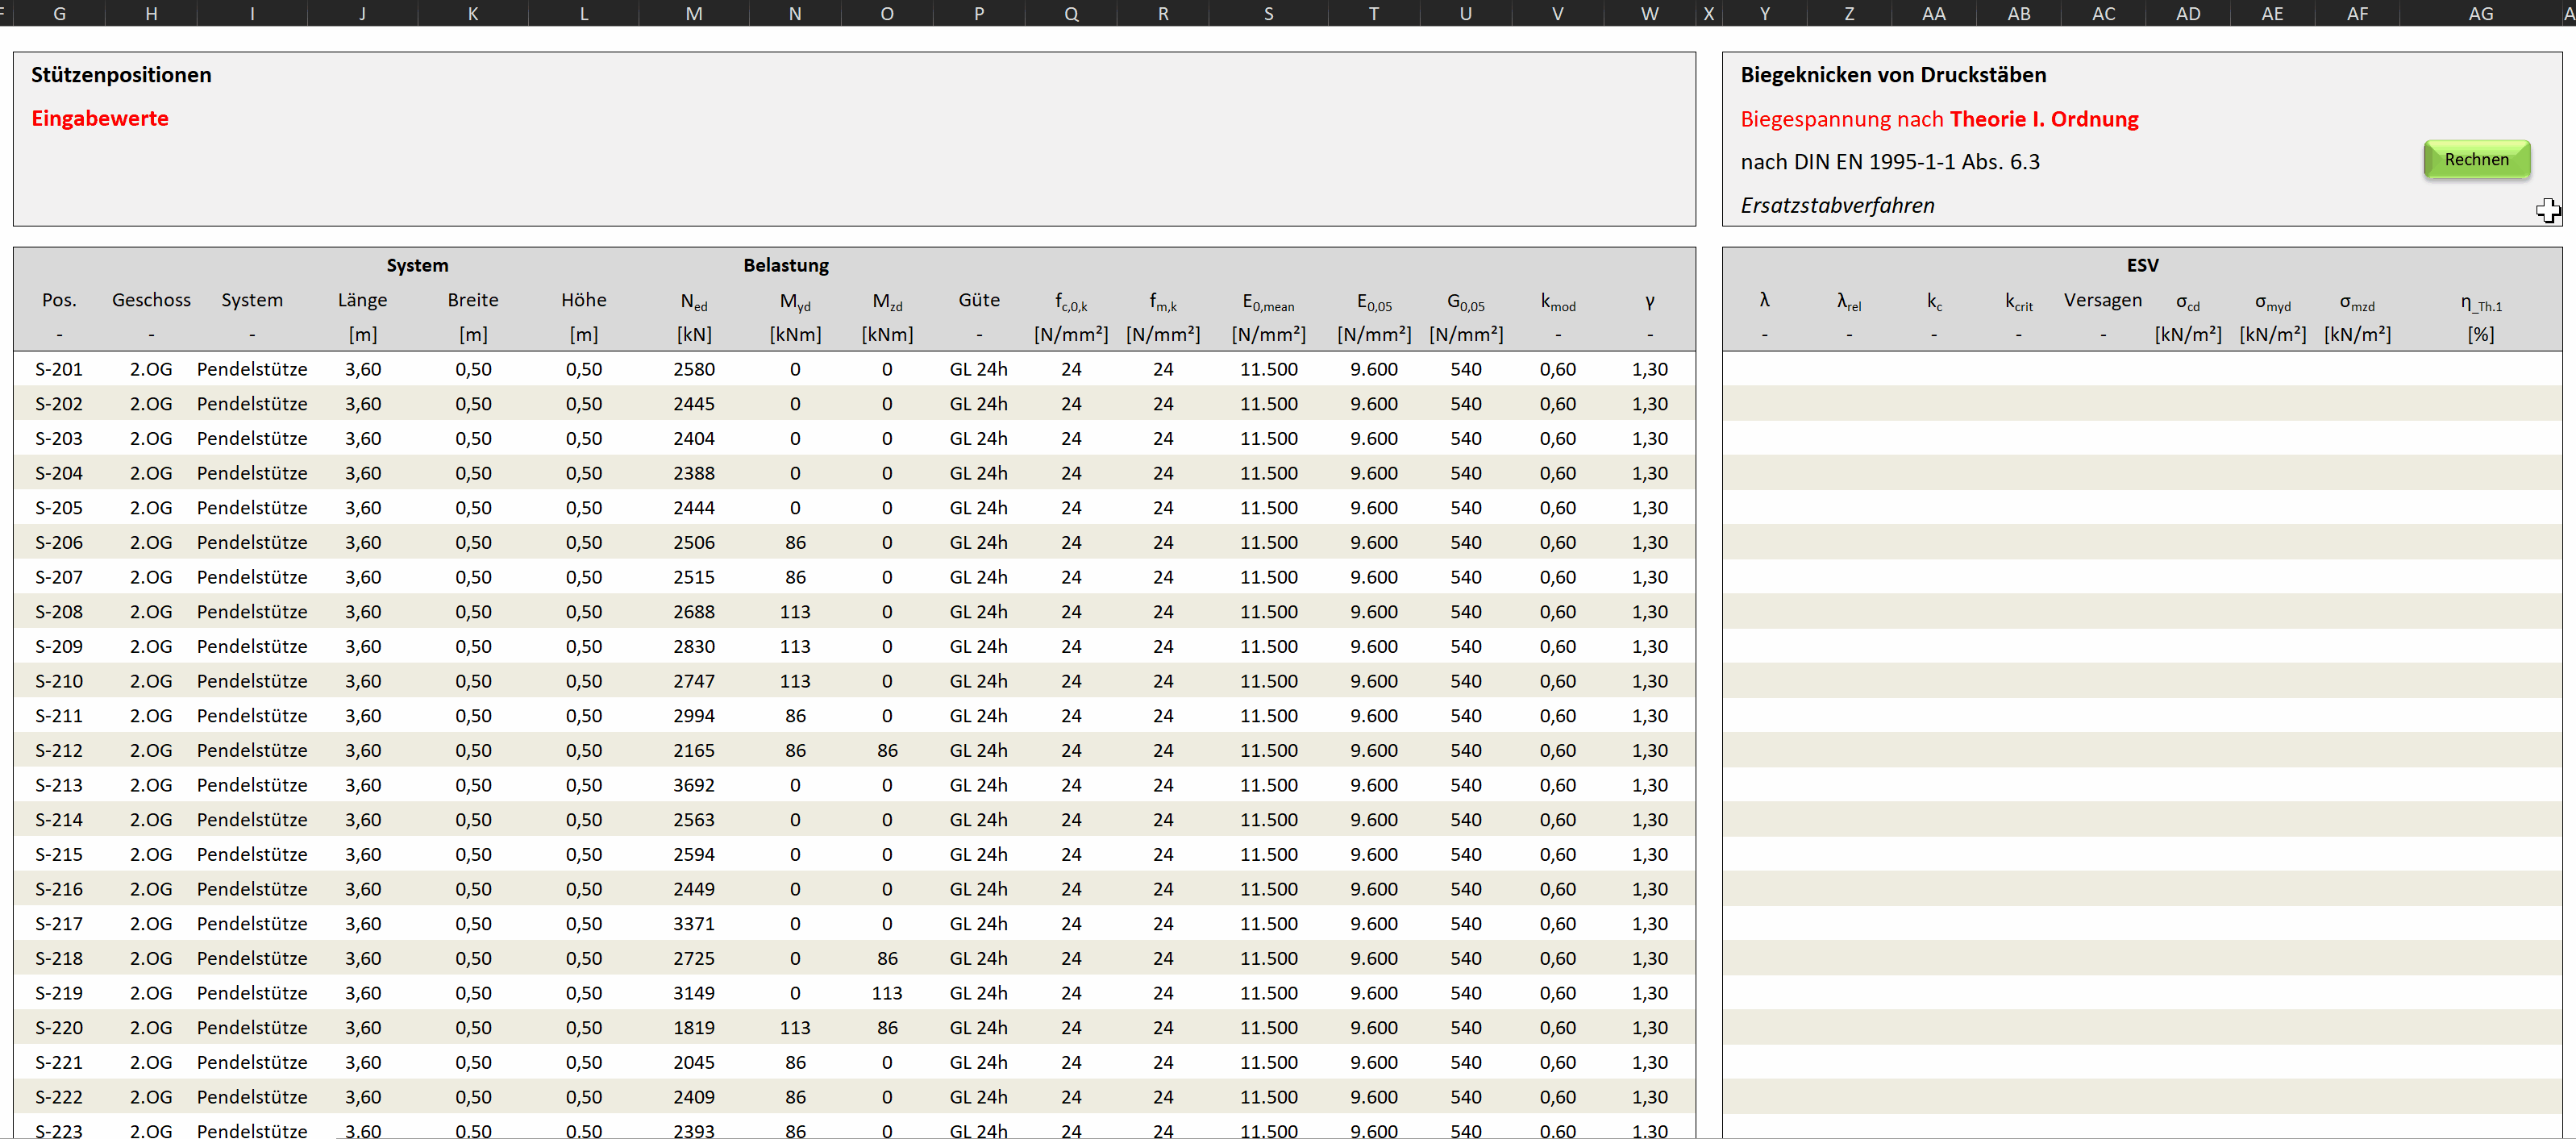

### Stützenbemessung nach Theorie II. Ordnung

<div class="alert alert-block alert-danger">
<b>Achtung:</b> Die Ausführung der folgenden Zeilen führt einen Code im Stützenbemessungsprogramm (Stützenbemessung_ec5_63.xlsm) aus.
</div>

In [30]:
#Excel
wb = xw.Book('Stützenbemessung_ec5_63.xlsm') 
ws = wb.sheets['Stützenbemessung']

startrow = 10
rownum = ws.range('G10').current_region.last_cell.row
colnum = ws.range((startrow,1)).current_region.last_cell.column

##Alte Daten löschen
ws.range('AI10:AQ100').value = ""

#Einlesen der Listen
L_pos = ws.range((startrow,7), (rownum,7)).value
L_ges = ws.range((startrow,8), (rownum,8)).value
L_system = ws.range((startrow,9), (rownum,9)).value
L_L = ws.range((startrow,10), (rownum,10)).value
L_b = ws.range((startrow,11), (rownum,11)).value
L_h = ws.range((startrow,12), (rownum,12)).value
L_N_ed = ws.range((startrow,13), (rownum,13)).value
L_M_yd = ws.range((startrow,14), (rownum,14)).value
L_M_zd = ws.range((startrow,15), (rownum,15)).value
L_h_art = ws.range((startrow,16), (rownum,15)).value
L_f_c0k = ws.range((startrow,17), (rownum,17)).value
L_f_myk = ws.range((startrow,18), (rownum,18)).value
L_E0mean = ws.range((startrow,19), (rownum,19)).value
L_E_05 = ws.range((startrow,20), (rownum,20)).value
L_G_05 = ws.range((startrow,21), (rownum,21)).value
L_k_mod = ws.range((startrow,22), (rownum,22)).value
L_gamma = ws.range((startrow,23), (rownum,23)).value

for j in range(rownum - startrow +1):

    # ... EINGABEWERTE
    L = L_L[j]
    b = L_b[j]
    h = L_h[j]
    f_c0k = L_f_c0k[j]*1000
    f_myk = L_f_myk[j]*1000
    f_mzk = f_myk
    E0_mean = L_E0mean[j]*1000
    E_05 = L_E_05[j]*1000
    k_mod = L_k_mod[j]
    gamma = L_gamma[j]
    N_ed = L_N_ed[j]
    M_yd = L_M_yd[j]
    M_zd = L_M_zd[j]

    güte = L_h_art[j]
    Lagerung = L_system[j]

    theta = 0.0025

    no_iter = 5
    E = E0_mean

    # ... KENNWERTE
    shi = k_mod/gamma
    f_c0d = f_c0k*shi
    f_myd =f_myk*shi

    A = b*h
    I = b*h**3/12
    w = (b*h**2)/6
    i = (I/A)**0.5


    # ... NICHT LINEARE ITERATION
    L_e, L_M, L_e_total, L_M_total, sigma_cd, L_sigma_mIId, eta = ec5_62_th2(Lagerung,güte,L,b,h,N_ed,M_yd,M_zd,theta,f_c0k,f_myk,f_mzk,E,k_mod,gamma,no_iter)


    # ... EXCEL
    ws.range('AI10').offset(j,0).value = L_e[0][0]
    ws.range('AJ10').offset(j,0).value = L_M[0][0]
    ws.range('AK10').offset(j,0).value = L_e_total[0][-1]
    ws.range('AL10').offset(j,0).value = L_M_total[0][-1]

    ws.range('AM10').offset(j,0).value = L_e[1][0]
    ws.range('AN10').offset(j,0).value = L_M[1][0]
    ws.range('AO10').offset(j,0).value = L_e_total[1][-1]
    ws.range('AP10').offset(j,0).value = L_M_total[1][-1]

    ws.range('AQ10').offset(j,0).value = eta

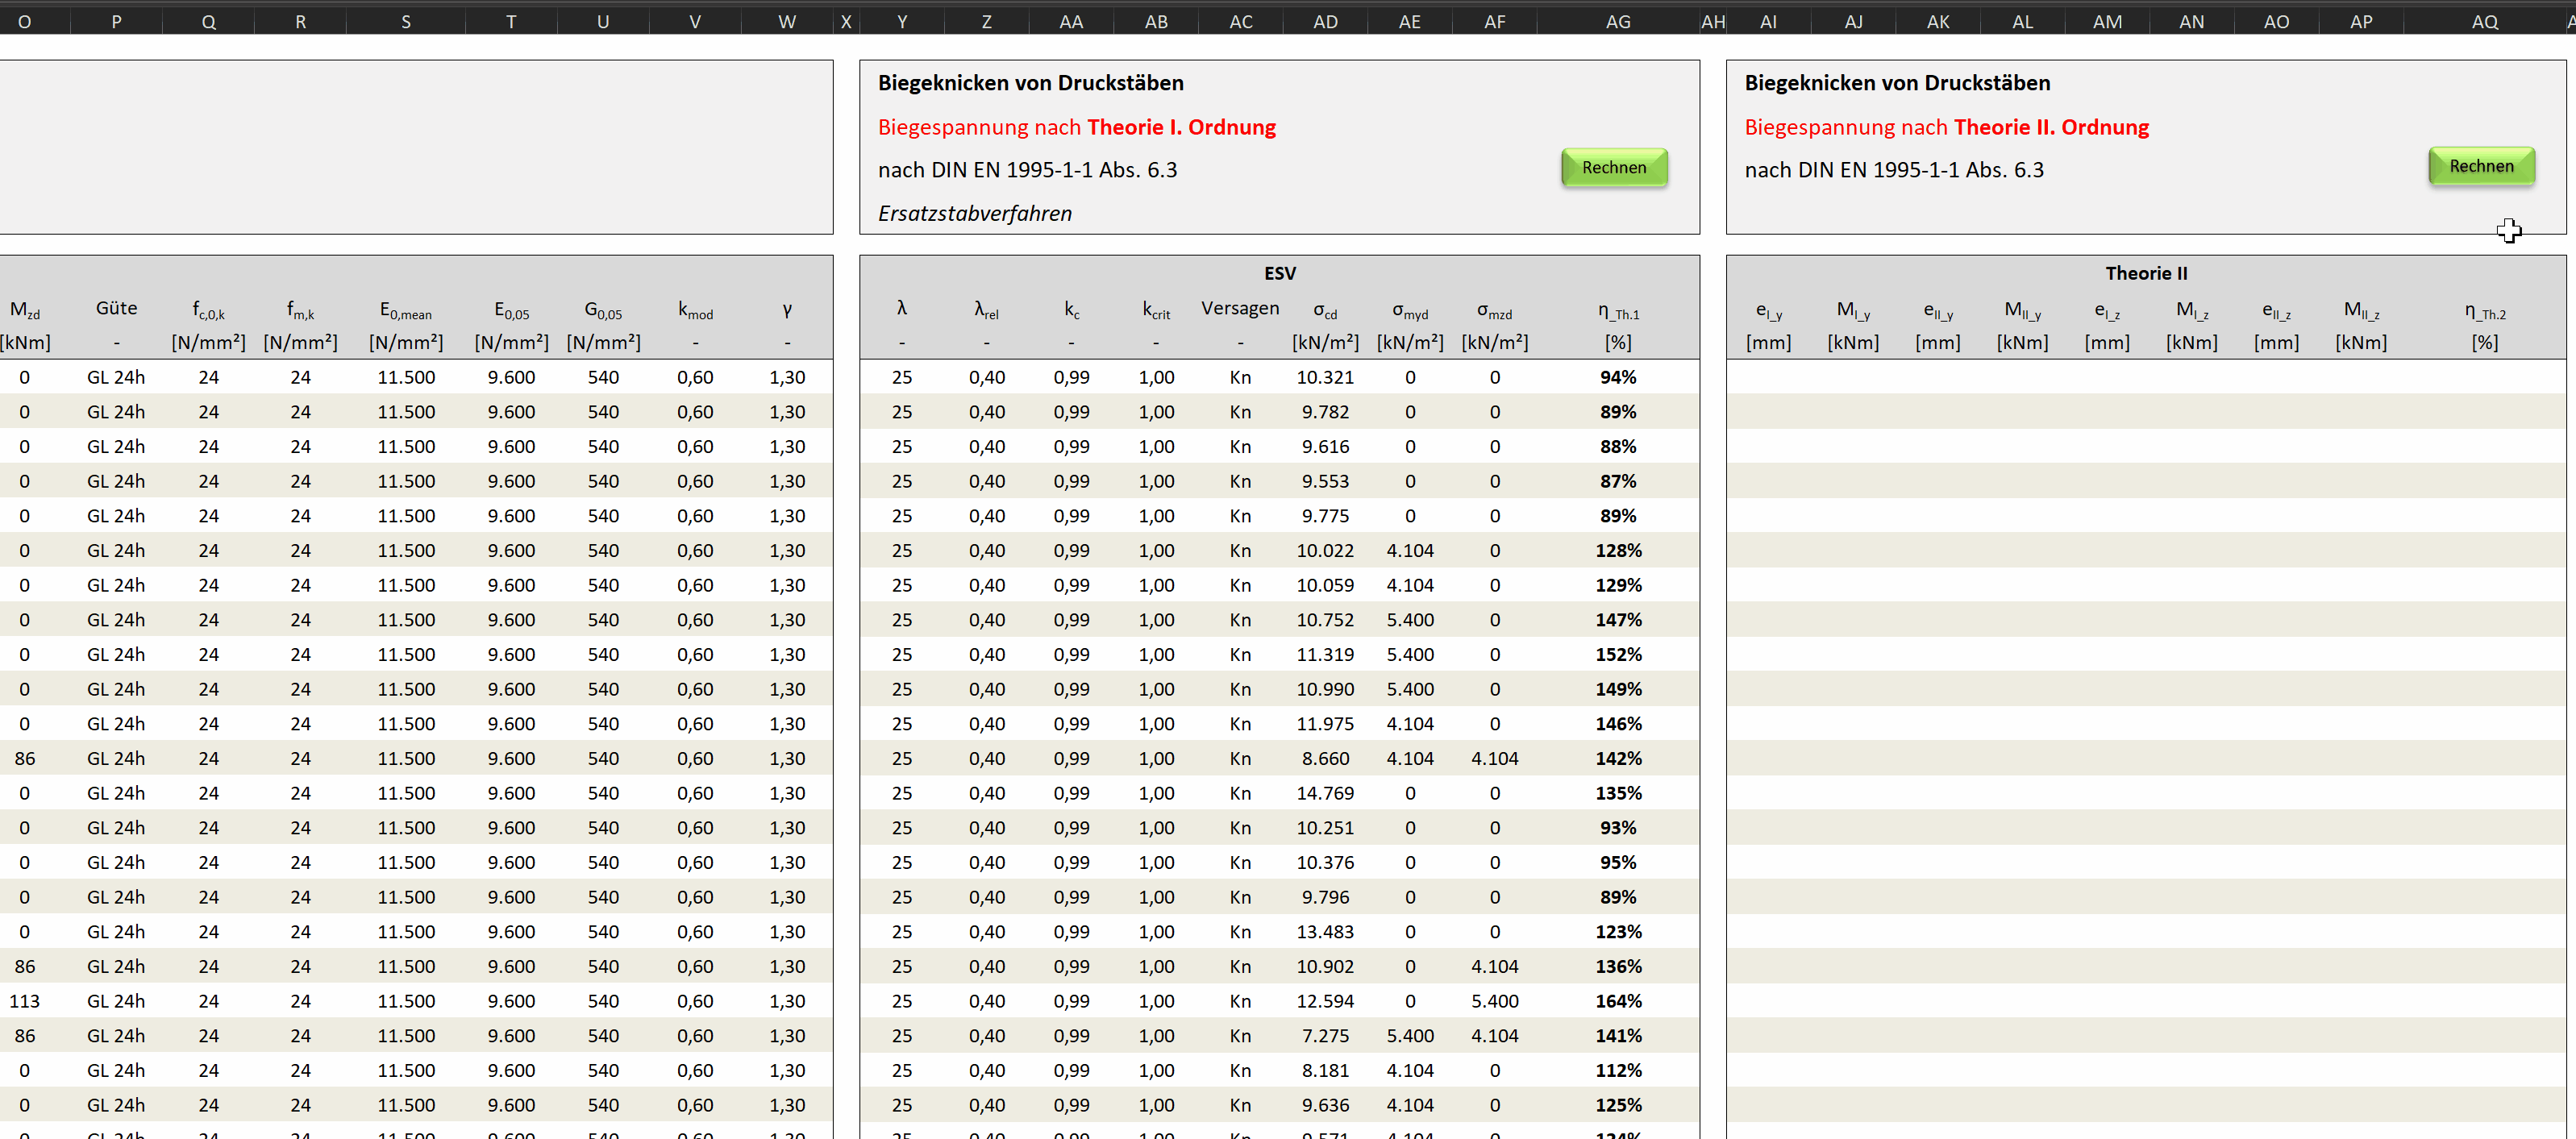